In [1]:
import matplotlib.pyplot as plt
import torch
from torch.distributions.multivariate_normal import MultivariateNormal

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("device:", device)
if torch.cuda.is_available():
    torch.set_default_tensor_type('torch.cuda.FloatTensor')

device: cpu


## Dimension = 200

In [3]:
d = 200 # dimension (number of weights) of the linear model
beta  = torch.rand(d) # set the actual weights
beta  = beta / torch.norm(beta) # norm of beta = 1
sim   = 40  # conducting 20 simulations for each value of n
s1    = 0.1
s2    = 0.5
s3    = 1

smallest_n = torch.arange(1, 5, 1)
smaller_n  = torch.arange(5, 170, 5)
small_n    = torch.arange(170, 196, 2)
around     = torch.arange(196, 204, 1)
large_n    = torch.arange(204, 250, 2)
larger_n   = torch.arange(250, 600, 5)
n_vals = torch.cat([smallest_n, smaller_n, small_n, around, large_n, larger_n])
M = n_vals.size()[0]
print(f'We set {M} candidates for sample size (n).')

We set 151 candidates for sample size (n).


In [4]:
def run_simulation(n_vals, num_sim, s, d):
    M = n_vals.size()[0]
    test_mse  = torch.zeros((M, num_sim))

    for i in range(M):
        for j in range(num_sim):
            n = n_vals[i] # sample size
            mean = torch.zeros((d,))
            Id = torch.eye(d)
            norm = MultivariateNormal(mean, Id)
            X_train = norm.sample(sample_shape=(n,)) # X training data
            X_test  = norm.sample(sample_shape=(n,)) # X testing data
            noise1 = torch.normal(torch.zeros((n,)), torch.full((n,), s))
            noise2 = torch.normal(torch.zeros((n,)), torch.full((n,), s))
            Y_train = torch.matmul(X_train, beta) + noise1
            Y_test  = torch.matmul(X_test, beta) + noise2

            # vanilla linear regression
            if n < d:
                beta_hat = torch.matmul(torch.linalg.pinv(X_train), Y_train)
            else:
                p1 = torch.linalg.inv(torch.matmul(torch.t(X_train), X_train))
                p2 = torch.matmul(p1, torch.t(X_train))
                beta_hat = torch.matmul(p2, Y_train)

            test_pred  = torch.matmul(X_test,  beta_hat)
            test_mse[i,j]  = torch.mean((Y_test - test_pred)**2)

    return test_mse

In [5]:
# NOTE: it takes about 5min to run this cell on Macbook Pro 2019 intel cpu.

test_mse_1 = run_simulation(n_vals, sim, s1, d)
avgs_test_loss_1 = torch.mean(test_mse_1, 1)
test_mse_2 = run_simulation(n_vals, sim, s2, d)
avgs_test_loss_2 = torch.mean(test_mse_2, 1)
test_mse_3 = run_simulation(n_vals, sim, s3, d)
avgs_test_loss_3 = torch.mean(test_mse_3, 1)

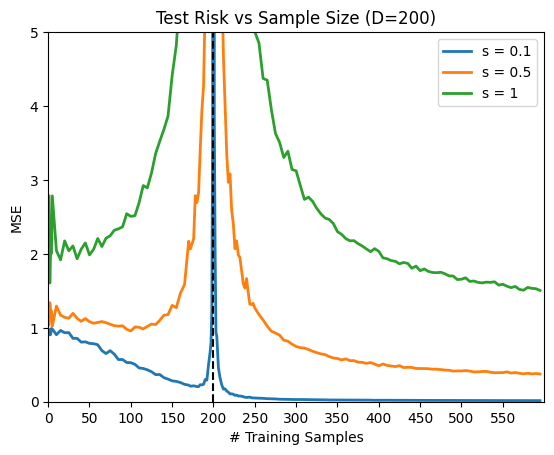

In [7]:
plt.title("Test Risk vs Sample Size (D=200)")
plt.xlabel("# Training Samples")
plt.ylabel("MSE")
plt.ylim(0, 5)
plt.xlim(0, 600)
plt.plot(n_vals, avgs_test_loss_1, lw=2, label=f's = {s1}')
plt.plot(n_vals, avgs_test_loss_2, lw=2, label=f's = {s2}')
plt.plot(n_vals, avgs_test_loss_3, lw=2, label=f's = {s3}')
plt.axvline(x=d, color='black', ls='--')
plt.xticks(torch.arange(0,600,step=50))
plt.legend(loc="best")
plt.show()

## Dimension = 500

In [9]:
d = 500 # dimension (number of weights) of the linear model
beta  = torch.rand(d) # set the actual weights
beta  = beta / torch.norm(beta) # norm of beta = 1
sim   = 40  # conducting 20 simulations for each value of n
s1    = 0.1
s2    = 0.5
s3    = 1

small_d2 = torch.arange(5,380,10)
around_n2 = torch.arange(380,470,5)
around_n_greater2 = torch.arange(470,490,2)
large_d2 = torch.arange(490,510,1)
larger_d2 = torch.arange(510,600,2)
more_d2 = torch.arange(600,700,5)
largest_d2 = torch.arange(700,1001,5)

smallest_n = torch.arange(1, 380, 10)
smaller_n  = torch.arange(380, 470, 5)
small_n    = torch.arange(470, 490, 2)
around     = torch.arange(490, 510, 1)
large_n    = torch.arange(510, 600, 2)
larger_n   = torch.arange(600, 801, 5)
n_vals = torch.cat([smallest_n, smaller_n, small_n, around, large_n, larger_n])
M = n_vals.size()[0]
print(f'We set {M} candidates for sample size (n).')

We set 172 candidates for sample size (n).


In [10]:
# NOTE: it takes about 220min to run this cell on Macbook Pro 2019 intel cpu.

test_mse_1 = run_simulation(n_vals, sim, s1, d)
avgs_test_loss_1 = torch.mean(test_mse_1, 1)
test_mse_2 = run_simulation(n_vals, sim, s2, d)
avgs_test_loss_2 = torch.mean(test_mse_2, 1)
test_mse_3 = run_simulation(n_vals, sim, s3, d)
avgs_test_loss_3 = torch.mean(test_mse_3, 1)

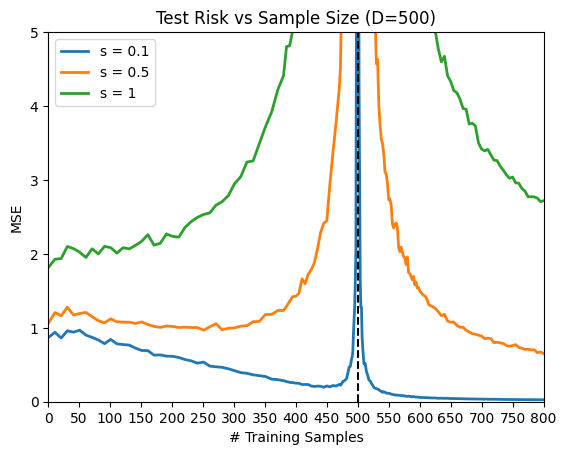

In [11]:
plt.title("Test Risk vs Sample Size (D=500)")
plt.xlabel("# Training Samples")
plt.ylabel("MSE")
plt.ylim(0, 5)
plt.xlim(0, 801)
plt.plot(n_vals, avgs_test_loss_1, lw=2, label=f's = {s1}')
plt.plot(n_vals, avgs_test_loss_2, lw=2, label=f's = {s2}')
plt.plot(n_vals, avgs_test_loss_3, lw=2, label=f's = {s3}')
plt.axvline(x=d, color='black', ls='--')
plt.xticks(torch.arange(0,801,step=50))
plt.legend(loc="best")
plt.show()